#PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE
##Facultad de Matemática 
##EPG4002 - Aprendizaje No Supervisado 
##Profesor: Jonathan Acosta
##Alumno: Ronald Castillo 
Fecha de entrega: 12/07/2022 a las 18:45 horas (vía canvas) 

Instrucciones: Pueden trabajar en grupos de 2 estudiantes. 

###Laboratorio N°2 
###Segundo bimestre 
_Objetivo:_ Aplicar las ténicas de conglomerados no jerárquico (K-medois) e indentificar la cantidad apropiada de grupos. Aplicar un análisis de componentes principales. 
Utilice el conjunto de datos "USArrests" disponibles en Python. 
1. (8 pts) Realice una pequeña descripción estadística de las variables del dataset. 


In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(4)

Murder  Assault  UrbanPop  Rape
Alabama     13.2      236        58  21.2
Alaska      10.0      263        48  44.5
Arizona      8.1      294        80  31.0
Arkansas     8.8      190        50  19.5

In [3]:
datos.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

Como se puede apreciar la media y desviacion estandart de los muertos es la menos, y la maxima cantidad es de `17.4`. Encambio, por otro lado, los asaltos son los que tienen mayor media y mayor desviacion estandart, esto es obvio, ya que una persona puede ser asaltada mas de una vez en la historia de la data, en cambio las muertes solo puede ser una vez y puede poco probable que sea una persona raptada.

2. (8 pts) Utilizar el método del codo para escoger la cantidad apropiada de Cluster cuando se aplica la ténica de agrupamiento K-medois (PAM).

In [4]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


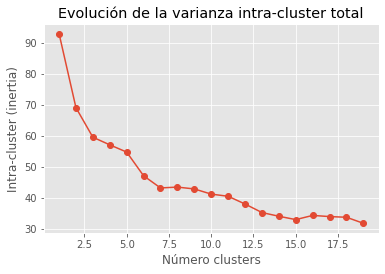

In [5]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Preprocesado y modelado
# ==============================================================================
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import scale

# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 20)
inertias = []
X_scaled = scale(datos)
for n_clusters in range_n_clusters:
  kmedoids = KMedoids(n_clusters=n_clusters)
  kmedoids.fit(X_scaled)
  inertias.append(kmedoids.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

El primer codo podriamos decir que esta en el valor de 4 clusters

3. (8 pts) Utilizar el método silhouette para escoger la cantidad apropiada de Cluster cuando se aplica la ténica de agrupamiento K-medois (PAM). 

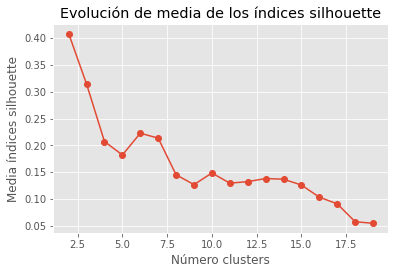

In [6]:
from sklearn.metrics import silhouette_score

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 20)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
  kmedoids = KMedoids(n_clusters=n_clusters)
  cluster_labels = kmedoids.fit_predict(X_scaled)
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

En este caso, el método de silhouette toma el valor maximo, que sería 2 clusters.

5. (8 pts) En caso que los métodos anteriores den resultados diferentes escoger uno de los dos y luego describir los grupos (promedio y desviación estándar de cada variable de cada grupo) seleccionados mediante PAM. 

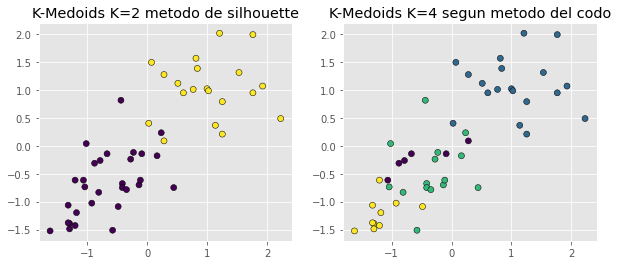

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict_silhouette = KMedoids(n_clusters=2).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict_silhouette,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('K-Medoids K=2 metodo de silhouette');

# Resultados para K = 4
# ==============================================================================
y_predict_codo = KMedoids(n_clusters=4).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict_codo,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('K-Medoids K=4 segun metodo del codo');

Como se puede ver, el methodo de slhouette tiene mejor clusterizacion

####Descripcion estadistica del metodo de la silhouette

In [16]:
from google.colab import data_table
from IPython.display import display
 
for i in range(2):
  print(f'cluster={i+1}:')
  display(data_table.DataTable(datos[y_predict_silhouette==i].describe()))

cluster=1:


cluster=2:


####Descripcion estadistica del metodo del codo

In [15]:
from google.colab import data_table
from IPython.display import display
 
for i in range(4):
  print(f'cluster={i+1}:')
  display(data_table.DataTable(datos[y_predict_codo==i].describe()))

cluster=1:


cluster=2:


cluster=3:


cluster=4:


6. (10 pts) Realizar el análisis de componentes principales al conjunto de Datos. Interpretar. 

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=datos.shape[1])
pca.fit(datos.corr())
x=pca.singular_values_
y=x*100/x.sum()
print(y.cumsum())

[ 64.297448    87.84087409 100.         100.        ]


Podemos ver, que con 2 componentes principales, superamos el 80%. Por lo que con estas 2 variables podriamos generar el cluster de mejor manera.

7. (10 pts) Graficar los grupos obtenidos mediante PAM a través de las primeras dos componentes principales. 

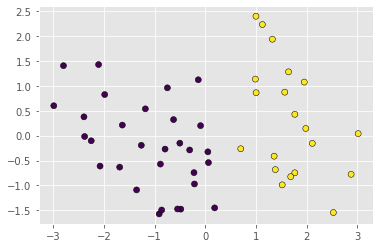

In [43]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(X_scaled)
#k-medoids escojidos los clusters por metodo de silhouette
kmedoids=KMedoids(n_clusters=2) 

# Resultados para K = 2 por metodo de silhouette
# ==============================================================================
y_predict= KMedoids(n_clusters=2).fit_predict(X=reduced_data)
plt.scatter(
        x = reduced_data[:, 0],
        y = reduced_data[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )

4. (8 pts) Utilizar el método Gap-Statistic para escoger la cantidad apropiada de Cluster cuando se aplica la ténica de agrupamiento K-medois (PAM). 

In [44]:
# Load R
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [46]:
%%R
#install packages of libraries
install.packages(c("cluster","factoextra","datasets"))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘reshape2’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/reshape2_1.4.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 37307 bytes (36 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to


Error in library("factoextra") : there is no package called ‘factoextra’


RInterpreterError: ignored

In [53]:
%%R
library("datasets")
data("USArrests")      # Load the data set
df <- scale(USArrests) # Scale the data
head(df)

               Murder   Assault   UrbanPop         Rape
Alabama    1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska     0.50786248 1.1068225 -1.2117642  2.484202941
Arizona    0.07163341 1.4788032  0.9989801  1.042878388
Arkansas   0.23234938 0.2308680 -1.0735927 -0.184916602
California 0.27826823 1.2628144  1.7589234  2.067820292
Colorado   0.02571456 0.3988593  0.8608085  1.864967207


Clustering k = 1,2,..., K.max (= 20): .. done
Bootstrapping, b = 1,2,..., B (= 100)  [one "." per sample]:
.................................................. 50 
.................................................. 100 


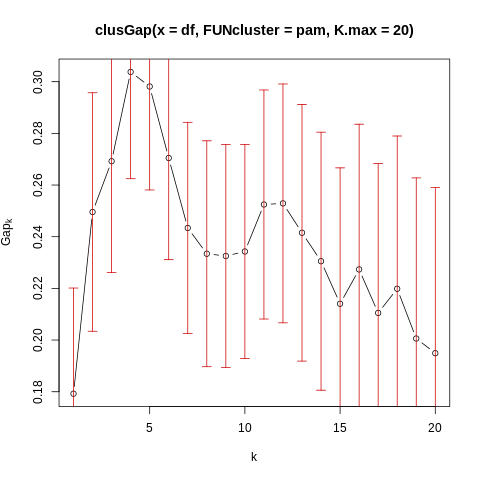

In [88]:
%%R
library(cluster)

gap<-clusGap(df, pam,20)
plot(gap)